In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib.image import imread
import numpy as np
from PIL import Image
import cv2 
import os 
import glob 
from numpy.linalg import eig
from numpy import array
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from numpy import linalg as LA


In [ ]:

images = []
for filename in sorted(os.listdir("/content/drive/MyDrive/ORL")):
    img = cv2.imread(os.path.join("/content/drive/MyDrive/ORL",filename),cv2.IMREAD_GRAYSCALE)
    if img is not None:
       ar=img.flatten()
     
       images.append(ar)
#images  
data =np.array(images)
data


array([[ 34,  34,  33, ...,  37,  40,  33],
       [ 42,  41,  44, ...,  42,  43,  41],
       [ 48,  49,  45, ...,  47,  46,  46],
       ...,
       [113, 112, 111, ...,  87,  87,  89],
       [112, 109, 116, ...,  93,  88,  92],
       [111, 114, 112, ...,  88,  86,  92]], dtype=uint8)

In [ ]:
vec=np.empty([400,1])
count=0;
for i in range(0,400):
  if (i%10==0):
    count+=1
  vec[i]=count
  
DataLab=np.hstack((data,vec)) 



In [ ]:
test=[]
train=[]
trainVec=np.empty([200,1])
testVec=np.empty([200,1])
k=0
l=0
for i in range(0,400):
  if (i%2==0):
    train.append(data[i])
    trainVec[k]=DataLab[i,10304]
    k+=1
  else:
    test.append(data[i])
    testVec[l]=DataLab[i,10304]
    l+=1
train=np.array(train)
test=np.array(test)
print(train.shape)
print(test.shape)
print(trainVec.shape)
print(testVec.shape)


(200, 10304)
(200, 10304)
(200, 1)
(200, 1)


**Classification Using LDA**

a. Use the pseudo code below for LDA. We will modify few lines in
pseudocode to handle multiclass LDA.
i. Calculate the mean vector for every class Mu1, Mu2, ..., Mu40.

In [ ]:
#LDA-Mean
mean=[]
temp=[]
count=0
temp.append(train[0])
for i in range(1,200):
  if (i%5==0):
    mean.append(np.mean(temp,0))
    temp.clear()
    count+=1
  temp.append(train[i])
 
mean.append(np.mean(temp,0))

mean=np.array(mean)
print("mean : ")
print( mean)
mean.shape





mean : 
[[ 45.2  50.   51.6 ...  36.6  37.2  37. ]
 [134.4 130.6 132.8 ...  33.4  42.8  45.6]
 [ 47.   46.4  47.  ...  34.4  34.2  39. ]
 ...
 [ 56.4  56.4  57.2 ...  64.   65.4  66. ]
 [121.4 120.  120.4 ...  63.8  65.   64. ]
 [107.  107.2 110.  ...  84.6  76.8  84.2]]


(40, 10304)

ii. Replace B matrix by Sb.
Sb = ∑nk(μk − μ)(μk − μ)

In [ ]:
#LDA Sb
overallMean=np.mean(train,0)
Sb=np.zeros((10304,10304))
temp=np.empty([10304,1])
for i in range(0,40):
  temp=np.subtract(mean[i].reshape(10304,1),overallMean.reshape(10304,1))
  temp=5*temp
  Sb=np.add(Sb,np.dot(temp,np.transpose(temp)))
print(Sb)
Sb.shape


[[1142059.775 1126678.55  1128001.55  ... -135810.725  -94167.375
   -55609.8  ]
 [1126678.55  1114231.1   1114159.1   ... -125802.45   -87799.75
   -51271.6  ]
 [1128001.55  1114159.1   1116797.1   ... -135117.45   -95739.75
   -57861.6  ]
 ...
 [-135810.725 -125802.45  -135117.45  ... 1499672.775 1461915.125
  1424656.2  ]
 [ -94167.375  -87799.75   -95739.75  ... 1461915.125 1482471.375
  1440093.   ]
 [ -55609.8    -51271.6    -57861.6   ... 1424656.2   1440093.
  1425113.6  ]]


(10304, 10304)

iii. S matrix remains the same, but it sums S1, S2, S3, ...S40.

In [ ]:
#computing S total=s1+s2+s3+...
temp=[]
temp.append(train[0])
empty=[]
k=0
St=np.zeros((10304,10304))
Sk=[]
centered=[]
for i in range(1,200):
  if (i%5==0):
    centered=temp-np.transpose(mean[k])  
    temp.clear()
    k+=1
    Sk=np.dot(np.transpose(centered),centered)
    centered=np.array(empty)   
    St=np.add(St,Sk)
  temp.append(train[i])
centered=temp-np.transpose(mean[k]) 
temp.clear()
k+=1
Sk=np.dot(np.transpose(centered),centered)
centered=np.array(empty)
St=np.add(St,Sk)
St

array([[ 27906.4,  27124. ,  27227.2, ...,  -2136.8,    439. ,   6393. ],
       [ 27124. ,  28947.2,  28018.2, ...,  -2275.4,   1679. ,   6850.4],
       [ 27227.2,  28018.2,  29013.2, ...,  -2122.6,   1946. ,   6453.8],
       ...,
       [ -2136.8,  -2275.4,  -2122.6, ..., 140943.2,  80518. ,  50058.4],
       [   439. ,   1679. ,   1946. , ...,  80518. ,  88147.6,  64694.6],
       [  6393. ,   6850.4,   6453.8, ...,  50058.4,  64694.6,  90457.2]])

iv. Use 39 dominant eigenvectors instead of just one. You will
have a projection matrix U39x10304.

In [ ]:
stInv=LA.inv(St)
arr=np.dot(stInv,Sb)




In [ ]:
eigen_values, eigen_vectors =LA.eigh(arr)
print( eigen_values)
print(eigen_vectors)
w=np.real( np.delete(eigen_vectors, np.s_[0:10265], axis=1)   )
print(w)




[-1.17110431e+20 -6.76695942e+19 -3.35468434e+19 ...  3.34735812e+19
  6.88736151e+19  1.17166762e+20]
[[ 0.00749915  0.02206207 -0.00510459 ...  0.00399988 -0.02138271
  -0.0076256 ]
 [ 0.00725071  0.02150676 -0.00527283 ...  0.00425681 -0.02100036
  -0.00740412]
 [ 0.00725951  0.02171366 -0.00565604 ...  0.00452652 -0.0209604
  -0.00736247]
 ...
 [ 0.01025344  0.01014426  0.0138784  ...  0.01312411  0.01017303
   0.01035137]
 [ 0.00283254 -0.00469117  0.00399483 ...  0.00362798 -0.00469939
   0.00286593]
 [-0.00888707 -0.0014774  -0.0181001  ... -0.01739702 -0.00150572
  -0.00901349]]
[[-0.01825479  0.01920133 -0.00622078 ...  0.00399988 -0.02138271
  -0.0076256 ]
 [-0.01913118  0.0207947  -0.00611337 ...  0.00425681 -0.02100036
  -0.00740412]
 [-0.0156959   0.01781786 -0.00469754 ...  0.00452652 -0.0209604
  -0.00736247]
 ...
 [ 0.00970229 -0.00199065 -0.03052509 ...  0.01312411  0.01017303
   0.01035137]
 [-0.0046861   0.00321522  0.00900207 ...  0.00362798 -0.00469939
   0.0028659

b. Project the training set, and test sets separately using the same
projection matrix U. You will have 39 dimensions in the new space.

In [ ]:

trainRed=np.zeros((200,39))
testRed=np.zeros((200,39))
trainRed=np.dot(train,w)
testRed=np.dot(test,w)




c. Use a simple classifier (first Nearest Neighbor to determine the class
labels).

In [ ]:
nas=np.transpose(trainVec)

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(trainRed, trainVec.ravel())  
test_predict = classifier.predict(testRed)   
true_predicted_count=0
for j in range(0,200):
   if test_predict[j] ==testVec[j]:
      true_predicted_count+=1

true_predicted_count

190

In [ ]:
accuracy=true_predicted_count/200
accuracy=accuracy*100
accuracy

95.0

Report Accuracy for the Multiclass LDA on the face recognition
dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainRed)

train_pca3 = scaler.transform(trainRed)
test_pca3 = scaler.transform(testRed)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(trainRed, trainVec)

y_pred = classifier.predict(testRed)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testVec, y_pred))
print(classification_report(testVec, y_pred))

[[5 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         5
         2.0       1.00      1.00      1.00         5
         3.0       0.83      1.00      0.91         5
         4.0       1.00      1.00      1.00         5
         5.0       0.83      1.00      0.91         5
         6.0       1.00      1.00      1.00         5
         7.0       0.62      1.00      0.77         5
         8.0       1.00      0.60      0.75         5
         9.0       1.00      1.00      1.00         5
        10.0       1.00      1.00      1.00         5
        11.0       1.00      0.80      0.89         5
        12.0       1.00      1.00      1.00         5
        13.0       1.00      1.00      1.00         5
        14.0       1.00      1.00      1.00         5
        15.0       1.00      1.00      1.00         5
        16.0   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


 **Classifier Tuning (LDA)**

In [ ]:
acc=[]
ks=[]
for i in range(1, 8,2):
  ks.append(i)
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(trainRed, trainVec.ravel())  
  test_predict = classifier.predict(testRed)   
  true_predicted_count=0
  for j in range(0,200):
     if test_predict[j] ==testVec[j]:
       true_predicted_count+=1
  accuracy=true_predicted_count/200
  accuracy=accuracy*100
  print("at k = ",i,", accuracy = ", accuracy)
  acc.append((true_predicted_count/200)*100)
  
    

at k =  1 , accuracy =  95.0
at k =  3 , accuracy =  88.0
at k =  5 , accuracy =  79.5
at k =  7 , accuracy =  76.5


Text(0, 0.5, 'accuracy')

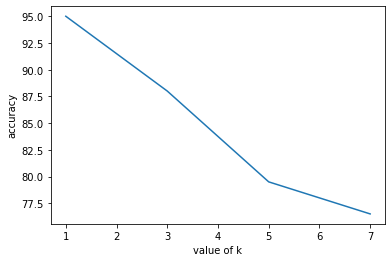

In [ ]:
plt.plot(ks, acc)
plt.xlabel('value of k')
plt.ylabel('accuracy')  